In [135]:
import sys
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from recommenders.datasets.python_splitters import python_stratified_split


In [92]:
rating = pd.read_csv('books_data/ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books = pd.read_csv('books_data/books.csv', sep=';', error_bad_lines=False, encoding="latin-1")

C:\Users\hamza\AppData\Local\Temp\ipykernel_2208\1427422357.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  rating = pd.read_csv('books_data/ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
C:\Users\hamza\AppData\Local\Temp\ipykernel_2208\1427422357.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('books_data/books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157

In [104]:
books.describe()
rating.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [105]:
books_df = pd.merge(rating, books, on='ISBN')
books_df['itemID'] = pd.factorize(books_df['ISBN'])[0]
books_df.rename(columns={'User-ID': 'userID', 'Book-Rating' : 'rating', 'Book-Title' : 'title', 'Book-Author' : 'author'}, inplace=True)
cols = ['Year-Of-Publication', 'Publisher', 'ISBN', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
books_df.drop(cols, axis=1, inplace=True)
books_df = books_df[books_df.rating != 0]



books_df.describe()


,userID,rating,itemID
count,383842.000000,383842.000000,383842.000000
mean,136031.461260,7.626701,65918.113794
std,80482.299401,1.841339,70877.165072
min,8.000000,1.000000,0.000000
25%,67591.000000,7.000000,10767.000000
50%,133789.000000,8.000000,34216.500000
75%,206219.000000,9.000000,105470.750000
max,278854.000000,10.000000,270150.000000


In [109]:
n_books = books_df['itemID'].nunique()
n_users = books_df['userID'].nunique()
n_ratings = (books_df['rating']).sum() 


print(f"Number of ratings: {n_ratings}")
print(f"Number of unique books's: {n_books}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per book: {round(n_ratings/n_books, 2)}")





Number of ratings: 2927448
Number of unique books's: 149836
Number of unique users: 68091
Average number of ratings per user: 42.99
Average number of ratings per book: 19.54


C:\Users\hamza\AppData\Local\Temp\ipykernel_2208\2487798434.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=books_df, palette="viridis")


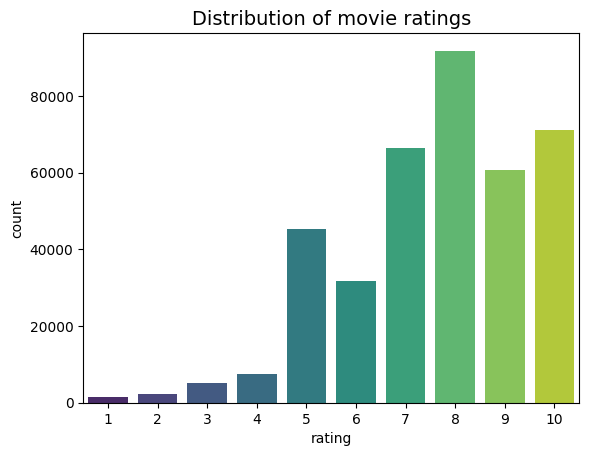

In [110]:
sns.countplot(x="rating", data=books_df, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [82]:
books_df['title'].value_counts()[0:10]

The Lovely Bones: A Novel                           707
Wild Animus                                         581
The Da Vinci Code                                   494
The Secret Life of Bees                             406
The Nanny Diaries: A Novel                          393
The Red Tent (Bestselling Backlist)                 383
Bridget Jones's Diary                               377
A Painted House                                     366
Life of Pi                                          336
Harry Potter and the Chamber of Secrets (Book 2)    326
Name: title, dtype: int64

In [85]:
print(f"Mean global rating: {round(books_df['rating'].mean(),2)}.")

mean_ratings = books_df.groupby('userID')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean global rating: 7.63.
Mean rating per user: 7.49.


In [125]:
books_df[books_df['author']== "Marcus Aurelius"]


,userID,rating,title,author,itemID
417960,9440,10,The Meditations of Marcus Aurelius Antoninus (...,Marcus Aurelius,24964
452444,11676,10,Meditations (Penguin Classics),Marcus Aurelius,28879
452445,18254,5,Meditations (Penguin Classics),Marcus Aurelius,28879
452448,163419,7,Meditations (Penguin Classics),Marcus Aurelius,28879
452449,188796,10,Meditations (Penguin Classics),Marcus Aurelius,28879
452450,219209,9,Meditations (Penguin Classics),Marcus Aurelius,28879
476449,36268,10,Meditations (Dover Thrift Editions),Marcus Aurelius,31190
476453,116284,9,Meditations (Dover Thrift Editions),Marcus Aurelius,31190
476458,203323,9,Meditations (Dover Thrift Editions),Marcus Aurelius,31190
760527,265553,8,"Meditations (Everyman's Library, No. 55)",Marcus Aurelius,100584


In [145]:
item_counts = books_df.groupby('userID').size()
num_items_with_10_or_more = item_counts[item_counts >= 10]
num_items_with_10_or_more = num_items_with_10_or_more.count()

print(f"Number of users with 10 or more entries: {num_items_with_10_or_more}")


Number of users with 10 or more entries: 6589


In [141]:
books_df.describe()

,userID,rating,itemID
count,383842.000000,383842.000000,383842.000000
mean,136031.461260,7.626701,65918.113794
std,80482.299401,1.841339,70877.165072
min,8.000000,1.000000,0.000000
25%,67591.000000,7.000000,10767.000000
50%,133789.000000,8.000000,34216.500000
75%,206219.000000,9.000000,105470.750000
max,278854.000000,10.000000,270150.000000


In [134]:
COL_USER = "userID"
COL_ITEM = "itemID"
COL_RATING = "rating"
COL_PREDICTION = "pred"


In [163]:
data_train, data_test = python_stratified_split(
    books_df, filter_by="user", min_rating=10, ratio=0.7,
    col_user=COL_USER, col_item=COL_ITEM
)

In [164]:
data_train.shape[0] + data_test.shape[0], books_df.shape[0]

(261899, 383842)

In [165]:
data_test.shape[0]

78703

In [166]:
data_test = data_test[data_test["userID"].isin(data_train["userID"].unique())]
data_test = data_test[data_test["itemID"].isin(data_train["itemID"].unique())]

In [167]:
data_test.shape[0]

47938

In [168]:
train_file = "books_data/train.csv"
test_file = "books_data/test.csv"
data_train.to_csv(train_file, index=False)
data_test.to_csv(test_file, index=False)

